<a href="https://colab.research.google.com/github/SaidKaawach/BIA0083-FinTech/blob/main/BIA0083-CreditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# download necessary libraries
!pip install scikit-learn
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

1. Open Google Colab, upload the dataset provided (credit.csv), and display the first few rows of the dataset.

In [ ]:
# Upload the dataset
from google.colab import files
uploaded = files.upload()

Saving credit.csv to credit.csv


In [ ]:
file_path = next(iter(uploaded))
credit_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(credit_data.head())

   LoanId  LoanAmount  InterestRate  Maturity  RemainMonths NickName RealName  \
0       1        5000          12.5         3             3       谢辉       谢*   
1       2        3000           5.0         6             0       一夫      杨**   
2       3        3000          10.0         3             0       赵楠       赵*   
3       4        5000          18.0        18             0       谢辉       谢*   
4       6        3000           6.0         6             6       野狼      李**   

           FirmName        IdCardNumber  CreditScore  ...  \
0            银华基金公司  341************814          210  ...   
1  人人融信商务顾问（北京）有限公司  110************51x          210  ...   
2        北京市君合律师事务所  110************247          210  ...   
3            银华基金公司  341************814          210  ...   
4      人人融信商务顾问有限公司  110************230          137  ...   

              UseofLoan   JobType      FirmSize      FirmType  \
0  Personal Consumption       NaN    100 to 500    State Firm   
1               

2. Preprocess the dataset by dropping columns that are not relevant for the analysis. List the columns you decided to drop and explain why.

In [ ]:
# Data Preprocessing
# For simplicity, we'll drop columns with too many missing values and non-numeric columns that are difficult to process
columns_to_drop = ['LoanId', 'NickName', 'RealName', 'FirmName', 'IdCardNumber', 'UseofLoan', 'JobType', 'FirmSize', 'FirmType', 'BirthDate', 'IndustrySector']
credit_data = credit_data.drop(columns=columns_to_drop)


3. Handle any missing values in the dataset by dropping rows with missing values. Check and report how many rows were removed.

In [ ]:
# Drop rows with missing values
credit_data = credit_data.dropna()

4. Convert the 'LoanStatus' column to a binary variable, where 'BAD_DEBT' is 1 and other statuses are 0. Display the first few rows of the modified dataset.


In [ ]:
# Convert LoanStatus to a binary variable (1 = BAD_DEBT, 0 = otherwise)
credit_data['LoanStatus'] = credit_data['LoanStatus'].apply(lambda x: 1 if x == 'BAD_DEBT' else 0)

5. Use one-hot encoding to convert categorical variables to numeric. Explain what one-hot encoding is and why it is used. Display the first few rows of the encoded dataset.

In [ ]:
# Convert categorical columns to numeric using one-hot encoding
credit_data = pd.get_dummies(credit_data)

In [ ]:
# Display the first few rows after dropping columns and rows
print(credit_data.head())

    LoanAmount  InterestRate  Maturity  RemainMonths  CreditScore  BorrowerId  \
1         3000           5.0         6             0          210          13   
8         3000          12.0        12             0          210          13   
10        8000          15.0        12             0          135         225   
15        3000           8.8        12             0          210          13   
21        4000          15.0         3             0          210         361   

    CarYear  AvailableCredits  TotalCount  SuccessCount  ...  \
1    2010.0            500000          29            23  ...   
8    2010.0            500000          29            23  ...   
10   2010.0             50000           3             3  ...   
15   2010.0            500000          29            23  ...   
21   2011.0            100000          23            20  ...   

    EducationLevel_Master and Above  Gender_Female  Gender_Male  \
1                             False          False         Tr

6. Define the target variable (`y`) and feature variables (`X`).

In [ ]:
# Define the target variable and feature variables
# 'LoanStatus' is the target variable and the remaining columns are features
X = credit_data.drop('LoanStatus', axis=1)
y = credit_data['LoanStatus']

Split the dataset into training and testing sets with an 80-20 split. Report the number of samples in the training and testing sets.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. Initialize a logistic regression model with a maximum of 1000 iterations. Train the model using the training data.

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

8. Make predictions on the test data using the trained model.

In [ ]:
# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

9. Evaluate the model's performance by generating a confusion matrix and a classification report. Explain the terms precision, recall, F1-score, and support, and interpret the results.

In [ ]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[806   6]
 [ 22  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       812
           1       0.68      0.37      0.48        35

    accuracy                           0.97       847
   macro avg       0.83      0.68      0.73       847
weighted avg       0.96      0.97      0.96       847



**Confusion Matrix:**

806: True Negatives (TN) - The number of correctly predicted non-default cases.

6: False Positives (FP) - The number of non-default cases incorrectly predicted as defaults.

22: False Negatives (FN) - The number of default cases incorrectly predicted as non-defaults.

13: True Positives (TP) - The number of correctly predicted default cases.

10. Visualize the confusion matrix using a heatmap. Include labels for predicted and actual values and provide a title for the heatmap.

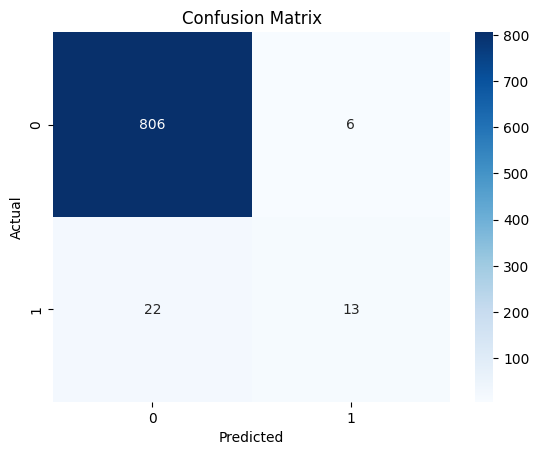

In [ ]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()